In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.RandomState(1234)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


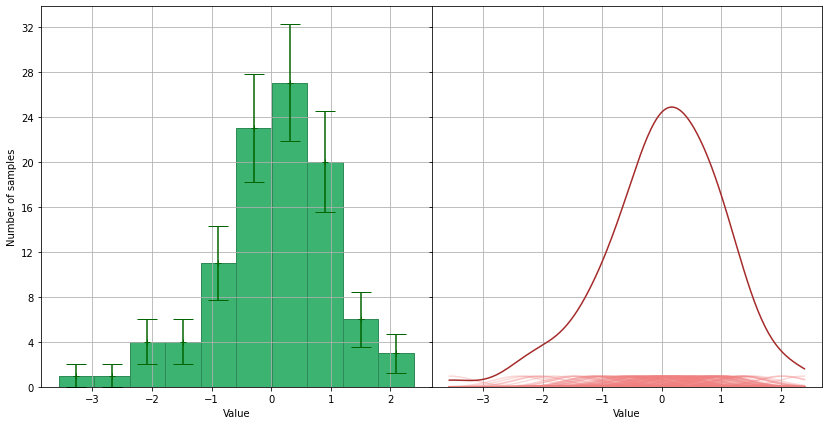

In [2]:
# EXERCISE 1

N_samples = 100
mean = 0
std = 1
values = rng.normal(loc=mean,scale=std,size=N_samples)
exp = (-1./5.) # used to calculate the std for each little gaussian

with plt.rc_context({'figure.figsize' : [14,7]}): #bigger plot in the notebook

    fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
    samples_per_bin,bins,patches=ax1.hist(values,10,color='mediumseagreen',edgecolor="seagreen")
    ax1.set_ylabel("Number of samples")
    ax1.set_xlabel("Value")

    from matplotlib.ticker import MaxNLocator # locator object determines the ticks in the axis chosen
    ax1.yaxis.set_major_locator(MaxNLocator(10,integer=True)) # MaxNLocator generater at most N=10 intervals between ticks.

    #get the center of each bin
    bins_center = [bins[i]+ (bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]

    errors = [N**0.5 for N in samples_per_bin] # is this right?
    ax1.errorbar(bins_center,samples_per_bin,errors,capsize=10 ,fmt="+",color="darkgreen")

    # second plot
    from scipy.stats import norm
    from scipy.integrate import trapezoid

    x_grid = np.linspace(values.min(),values.max(),200)
    y_gauss = np.empty(shape=(values.size,x_grid.size))
    std=1.06*values.size**(exp)*values.std()

    for idx,x in enumerate(values):
        y_gauss[idx]=norm.pdf(x_grid,loc=x,scale=std)
        ax2.plot(x_grid,y_gauss[idx],color='lightcoral',alpha=0.3)

    y_gauss_tot = np.sum(y_gauss,axis=0)
    integral=trapezoid(y_gauss_tot,x_grid)
    integral_histogram=(np.diff(bins) @ samples_per_bin)
    normalization = integral_histogram/integral

    ax2.plot(x_grid,y_gauss_tot*normalization,color='brown')
    ax2.set_xlabel("Value")

    fig.subplots_adjust(wspace=0)
    ax1.grid(True)
    ax2.grid(True)

    plt.show() 

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-14 00:48:32--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-14 00:48:33--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc04e153b1e279e3a2852ee4c5dc.dl.dropboxusercontent.com/cd/0/inline/BbxAXwWJaICl5Eu5B2dK8QCJ-Gk1gPVotjKMZAc2DLAb9PHYFHbNCbBa0xYkMQ6ZcU98T15KSIs6xVXbnBJ7rFmeyxgCfG3O5plkylijoTaqdv_p-pi5XYFvs5n-pMkMJzVWTZlGcp1V9iqO5x0igmNU/file# [following]
--2021-12-14 00:48:33--  https://uc04e153b1e279e3a2852ee4c5dc.dl.dropboxusercontent.com/cd/0/inline/BbxAXwWJaICl5Eu5B2dK8QCJ-Gk1gP

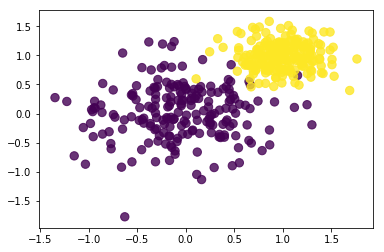

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

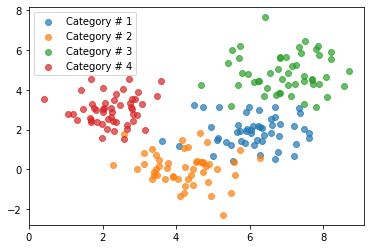

In [4]:
# EXERCISE 2

N_categories = 4
fig,ax = plt.subplots()

for category in range(N_categories):
    mean = rng.randint(10,size=2)
    cov = np.array([[rng.uniform(0.5,1),0],[0,rng.uniform(0.5,1)]]) # selecting covariance matrix to be orthogonal and of eigenvalues between 0.5 and 1
    cloud=rng.multivariate_normal(mean=mean,cov=cov,size=50)
    ax.scatter(cloud[:,0],cloud[:,1],alpha=0.7,label='Category # {}'.format(category+1))

ax.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-14 00:48:35--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-14 00:48:35--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4c2d88ad2f67eee748ab00a9e.dl.dropboxusercontent.com/cd/0/inline/Bbze6KfVxSbtgUO2U9oKgo7MZFUYsOG7e9RpB3s1cj35YXroHZrzpnVzEUJuUXO8ih68wClItXuWnoj7vPWOnKOxHKZpsCdXsSFLVwF4T1SOrB1KebD7UyV2GKgu98JuT4u4BfS3Dvot7r_H8LLA9Ydh/file# [following]
--2021-12-14 00:48:35--  https://ucd4c2d88ad2f67eee748ab00a9e.dl.dropboxusercontent.com/cd/0/inline/Bbze6KfVxSbtgUO2U9oKgo7MZFUYsOG7e9RpB3s1cj35YXroHZrzpnVzEUJuUXO8ih68wClI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB


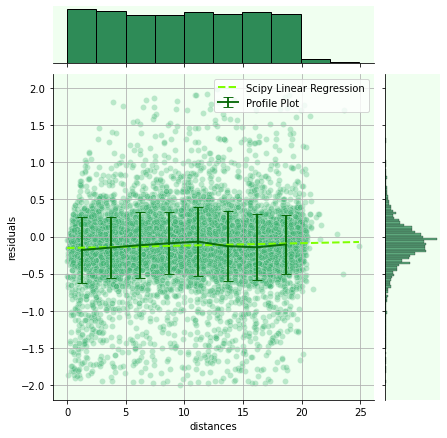

In [6]:
# EXERCISE 3

import pandas as pd
from scipy.stats import linregress

df = pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item()) # load
df.info() # inspect
df = df[abs(df)["residuals"]<2] #cleaning

linreg = linregress(df["distances"],df["residuals"]) # linregression using scipy

# instead of taking the easy route of simply calling the wrapper function sns.jointplot(kind='reg')
# we will go into more detail and work directly with the JointGrid Seaborn object in order to be able to call .hist directly on the marginal axis
# this way we can decide the number of bins and more importantly get the returning values of
# values_per_bin and bin_edges which we will use to create the profile plot on the joint ax, that again is easily manipulated
# if we work directly with the JointGrid object.
# all of this in order to get the profile plot bins aligned with the marginal histogram bins

g = sns.JointGrid()
sns.scatterplot(x=df['distances'], y=df['residuals'], ax=g.ax_joint,alpha=0.3,color='mediumseagreen')
sns.histplot(y=df['residuals'],color='seagreen',edgecolor='black', ax=g.ax_marg_y)
values_per_bin,bin_edges,patches=g.ax_marg_x.hist(x=df['distances'],edgecolor='black',color='seagreen')
# sns.kdeplot(y=df['residuals'], linewidth=2, ax=g.ax_marg_y) # broken


# profile plot; we build it to be exactly the same number of bins as the distances histogram already plotted
bins_center_ex3 = np.array([bin_edges[i]+ (bin_edges[i+1]-bin_edges[i])/2 for i in range(len(bin_edges)-1)]) # array of bin center
bins_x = np.digitize(df["distances"],bin_edges) #calling digitize like this actually labels the highest x value in its own bin. we need to fix it
bins_x[bins_x==bins_x.max()] = bins_x.max() - 1 # fixed
df["bin"]=bins_x
y=df.groupby('bin').mean()["residuals"]
erry=df.groupby('bin').std()['residuals'] 
g.ax_joint.errorbar(bins_center_ex3[:-2],y[:-2],erry[:-2],label='Profile Plot',color='darkgreen',ecolor='darkgreen',linewidth=2,capsize=5,alpha=0.9) # restricting to [:-2] to stop before 20

# trying to call the seaborne method for regression is a just a pain at this point so why not use the scipy linear regression we've already computed
reg_x = np.linspace(df['distances'].min(),df['distances'].max())
g.ax_joint.plot(reg_x,(reg_x*linreg.slope + linreg.intercept),color='chartreuse',linestyle='--',linewidth=2,label='Scipy Linear Regression')

for ax in g.fig.axes: ax.set_facecolor('honeydew')
g.ax_joint.grid(True)
g.ax_joint.legend()
plt.show()

